In [1]:
from NN import LayerNetwork
from Gate import *
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import logging
logging.basicConfig(level=logging.WARN)

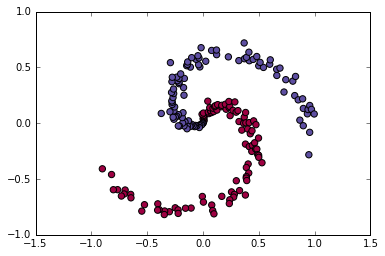

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

In [3]:
def gen_features(xy):
    return xy[0], xy[1], xy[0]**2, xy[1]**2
data = np.array([gen_features(x) for x in X])
labels = [1 if x else -1 for x in y]

In [18]:
def train_model(model, data, labels, niter=400, nplots=6):
    colors = ['blue' if x == 1 else 'green' for x in labels]

    def eval_model(data, labels, model):
        return sum([model.predict(d) == l for d, l in zip(data, labels)]) * 100. / len(labels)

    plot_freq = niter // nplots

    scores = []
    fsize = 6
    fig = plt.figure(figsize=(fsize * 2, fsize*nplots))
    pn = 1
    for i in range(niter):
        # Train on all the data in this iteration
        for d, l in zip(data, labels):
            model.train(d, l)

            
        if i % plot_freq == 0 or i == niter - 1:
            print("Done %d training rounds (%i runs)" % (i, i * len(labels)))
            #scores.append(eval_model(data, labels, model))
            ax = fig.add_subplot(nplots + 1, 2, pn)

            pn += 1

            x_min, y_min = -1.5, -1.5
            x_max, y_max = 1.5, 1.5
            h = 0.1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
            Z = np.array([model.predict(gen_features(vals)) for vals in np.c_[xx.ravel(), yy.ravel()]])
            Z = Z.reshape(xx.shape)
            #print(yy.ravel())
            #print(Z)
            ax.contourf(xx, yy, Z, cmap='Blues')

            ax.scatter(*data.T, color=colors)
            ax.set_title("%d" % i)
    fig.show()
    #plt.plot(scores)
    #plt.show()

Done 0 training rounds (0 runs)
Done 1000 training rounds (200000 runs)
Done 2000 training rounds (400000 runs)
Done 3000 training rounds (600000 runs)
Done 4000 training rounds (800000 runs)
Done 5000 training rounds (1000000 runs)
Done 6000 training rounds (1200000 runs)
Done 7000 training rounds (1400000 runs)


KeyboardInterrupt: 

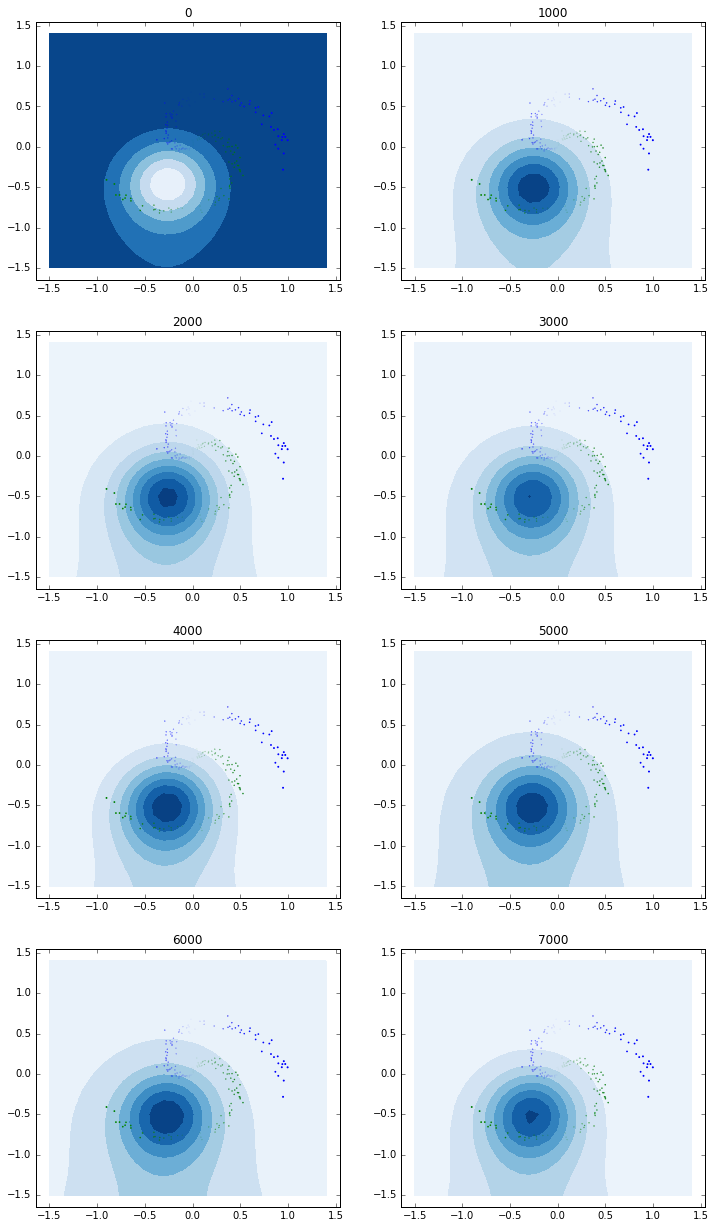

In [23]:
model = LayerNetwork(4, layers=[8, 2, 2], ActivationGate=TanHGate, step_size = 0.03, regularisation=False)
train_model(model, data, labels, niter=10000, nplots=10)